# Robótica - Entregável 1

### Professor: Tiago Pereira do Nascimento

### Grupo: Aléxandros Augustus (11501517) e Jaqueline Donin (20160144455)

##### Algoritmo: A*

In [1]:
# Credit for this: Nicholas Swift
# as found at https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2
# edit by Ryan Colling Wood at https://gist.github.com/ryancollingwood/32446307e976a11a1185a5394d6657bc
from warnings import warn
import heapq

class Node:
    """
    A node class for A* Pathfinding
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position
    
    def __repr__(self):
      return f"{self.position} - g: {self.g} h: {self.h} f: {self.f}"

    # defining less than for purposes of heap queue
    def __lt__(self, other):
      return self.f < other.f
    
    # defining greater than for purposes of heap queue
    def __gt__(self, other):
      return self.f > other.f

def return_path(current_node):
    path = []
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    return path[::-1]  # Return reversed path


def astar(maze, start, end):
    """
    Returns a list of tuples as a path from the given start to the given end in the given maze
    :param maze:
    :param start:
    :param end:
    :return:
    """

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Heapify the open_list and Add the start node
    heapq.heapify(open_list) 
    heapq.heappush(open_list, start_node)

    # Adding a stop condition
    outer_iterations = 0
    max_iterations = (len(maze[0]) * len(maze) // 2)

    # what squares do we search
    adjacent_squares = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    # Loop until you find the end
    while len(open_list) > 0:
        outer_iterations += 1

        if outer_iterations > max_iterations:
          # if we hit this point return the path such as it is
          # it will not contain the destination
          warn("giving up on pathfinding too many iterations")
          return return_path(current_node)       
        
        # Get the current node
        current_node = heapq.heappop(open_list)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            return return_path(current_node)

        # Generate children
        children = []
        
        for new_position in adjacent_squares: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:
            # Child is on the closed list
            if len([closed_child for closed_child in closed_list if closed_child == child]) > 0:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            if len([open_node for open_node in open_list if child.position == open_node.position and child.g > open_node.g]) > 0:
                continue

            # Add the child to the open list
            heapq.heappush(open_list, child)

    warn("Couldn't get a path to destination")
    return None

In [2]:
## BIBLIOTECAS
from PIL import Image #ler mapa
import numpy as np #ajusta mapa para array
import matplotlib.pyplot as plt #plota imagens
import copy #copia o labrinto para pintar o trajeto encontrado pelo algoritmo

In [3]:
## LENDO IMAGEM DO MAPA
img = Image.open("mapinha_inflado.bmp")
## TRANSFORMANDO EM UMA LISTA
maze = (np.logical_not((np.array(img)[:,:,0])/255).astype(int)).tolist()

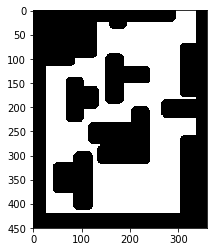

In [4]:
plt.imshow(maze,cmap='gnuplot2_r');

In [5]:
## COORDENADAS
start = (50,250)
## O COMANDO ABAIXO MOSTRA SE OS PONTOs SÃO VÁLIDOS, ISTO É 
## SE ELES NÃO ESTÃO SOBRE UM OBSTÁCULO OU PAREDE, PONTOS VÁLIDOS SÃO 0 E INVÁLIDOS 1
print(maze[50][250])
end = (400,280)
print(maze[400][280])

0
0


In [6]:
path = astar(maze, start, end)


In [7]:
## CAMINHO PERCORRIDO
print(path)

[(50, 250), (51, 251), (52, 252), (53, 253), (54, 254), (55, 255), (56, 256), (57, 257), (58, 258), (59, 259), (60, 260), (61, 261), (62, 262), (63, 263), (64, 264), (65, 265), (66, 266), (67, 267), (68, 268), (69, 269), (70, 270), (71, 271), (72, 272), (73, 273), (74, 274), (75, 275), (76, 276), (77, 277), (78, 278), (79, 279), (80, 280), (81, 280), (82, 280), (83, 280), (84, 280), (85, 280), (86, 280), (87, 280), (88, 280), (89, 280), (90, 280), (91, 280), (92, 280), (93, 280), (94, 280), (95, 280), (96, 280), (97, 280), (98, 280), (99, 280), (100, 280), (101, 280), (102, 280), (103, 280), (104, 280), (105, 280), (106, 280), (107, 280), (108, 280), (109, 280), (110, 280), (111, 280), (112, 280), (113, 280), (114, 280), (115, 280), (116, 280), (117, 280), (118, 280), (119, 280), (120, 280), (121, 280), (122, 280), (123, 280), (124, 280), (125, 280), (126, 280), (127, 280), (128, 280), (129, 280), (130, 280), (131, 280), (132, 280), (133, 280), (134, 280), (135, 280), (136, 280), (137,

In [8]:
solution = copy.deepcopy(maze)

for x in path:
    solution[x[0]][x[1]] = .5

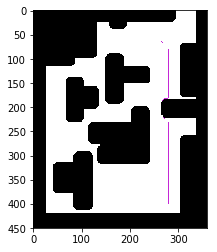

In [9]:
plt.imshow(solution,cmap='gnuplot2_r');

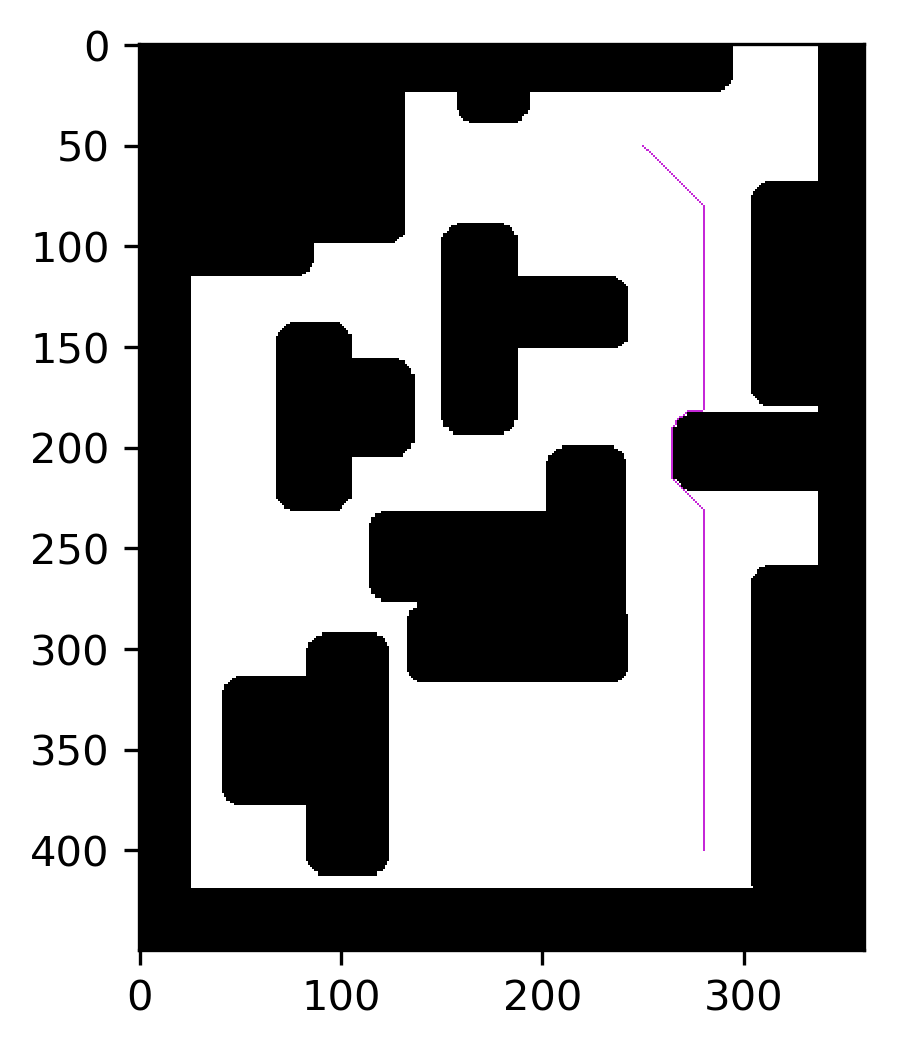

In [10]:
from matplotlib.pyplot import figure
## COMO O CAMINHO FICA QUASE INVISÍVEL NÓS AUMENTAMOS A RESOLUÇÃO
figure(dpi=300)
plt.imshow(solution,cmap='gnuplot2_r');

In [11]:
## AGORA VAMOS COLOCAR EM UM PONTO DIFERENTE E VER COMO ELE SE COMPORTA
## ISSO É TUDO, OBRIGADA PELA ATENÇÃO!